## Venicle Sales Analysis

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Reading in the data

In [2]:
path = r"C:\Users\lukas\OneDrive\Υπολογιστής\car_prices.csv"
df = pd.read_csv(path)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


#### Cleaning up the data

In [3]:
#Finding rows with NaN

nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

#Dropping rows with NaN

df = df.dropna(how='any')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
14,2014,Chevrolet,Cruze,2LT,Sedan,automatic,1g1pe5sbxe7120097,ca,NaN,15686.0,blue,black,avis rac/san leandro,13900.0,10600.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
16,2015,Hyundai,Sonata,SE,Sedan,automatic,5npe24af4fh001562,ca,NaN,8311.0,red,—,avis tra,15200.0,4200.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
22,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,NaN,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
25,2015,Hyundai,Sonata,SE,Sedan,automatic,5npe24af4fh038482,ca,NaN,9281.0,silver,gray,enterprise vehicle exchange / tra / rental / t...,15150.0,8500.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
28,2014,BMW,X5,sDrive35i,SUV,automatic,5uxkr2c52e0h33130,ca,NaN,11278.0,gray,black,avis rac/san leandro,50400.0,34000.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
# Checking if the null values were successful dropped

nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


#### Checking data types of the columns

In [5]:
print(df.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [6]:
# Adding car column 

df['car'] = df['make'] + ' ' + df['model'] + ' ' + df['trim']
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia Sorento LX
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Kia Sorento LX
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),BMW 3 Series 328i SULEV
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Volvo S60 T5
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),BMW 6 Series Gran Coupe 650i


#### Checking for outliers

<Axes: >

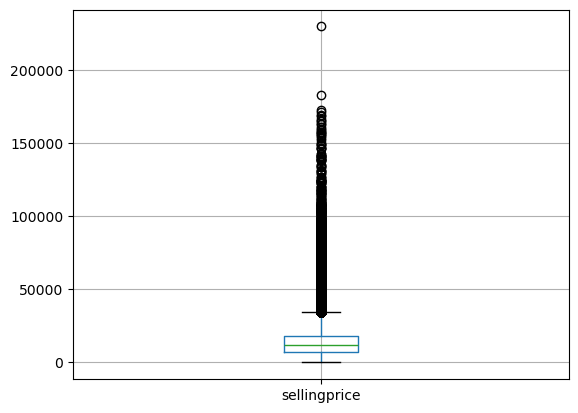

In [7]:
df.boxplot(column=['sellingprice'])

#### Filtering data 

In [8]:
z_scores = stats.zscore(df['sellingprice'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 12)
df = df[filtered_entries]

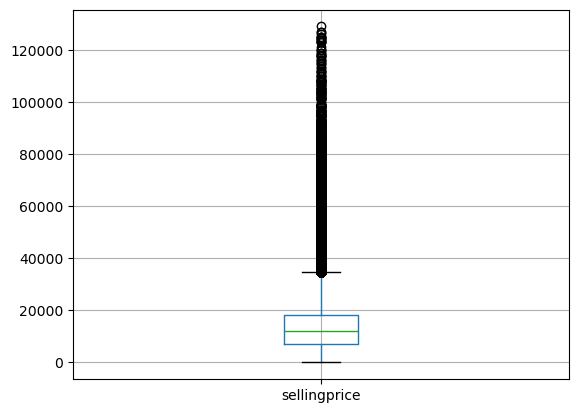

In [9]:
df.boxplot(column=['sellingprice'])
plt.show()

In [10]:
# Filter out car sales with a selling price under $100
df = df[df['sellingprice'] > 100]

# Check the results of the filter by describing the statistics for selling prices
print(df['sellingprice'].describe())

count    472256.000000
mean      13675.315943
std        9499.961722
min         150.000000
25%        7200.000000
50%       12200.000000
75%       18200.000000
max      129000.000000
Name: sellingprice, dtype: float64


## Data Exploration

#### Which car models were sold the most?

In [11]:
# group data by bar and count the number of sales for each car
car_sales_count = df.groupby('car')['car'].count().sort_values(ascending=False)

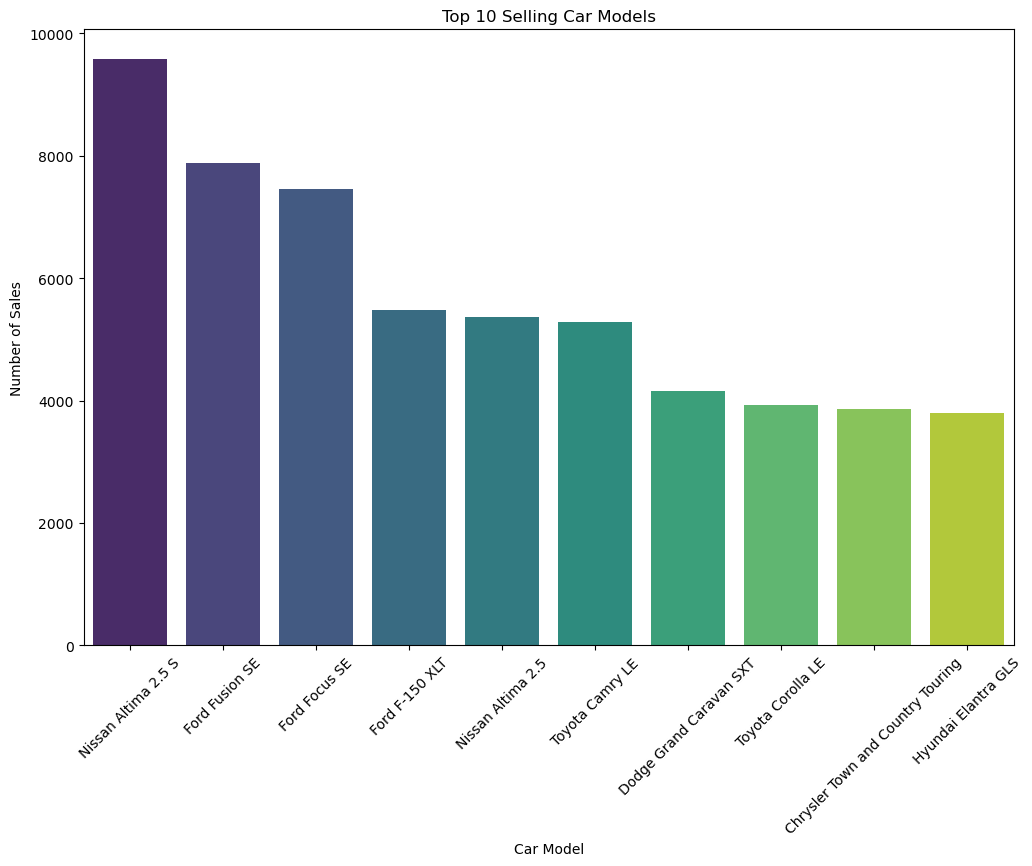

The car model that was sold the most is the Nissan Altima 2.5 S with 9586 sales.


In [12]:
# Visualizing top 10 Selling Cars

plt.figure(figsize=(12, 8))
sns.barplot(x=car_sales_count.head(10).index, y=car_sales_count.head(10).values, palette='viridis')
plt.title('Top 10 Selling Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Finds maximum index/model.
top_selling_model = car_sales_count.idxmax()
# Retrieves maximum value/count.
top_selling_model_sales = car_sales_count.max()

print(f"The car model that was sold the most is the {top_selling_model} with {top_selling_model_sales} sales.")

#### What is the percentage of sales by car color?

***This text clearly communicates your methodology and the purpose of using the pie chart, making it suitable for presentation to your supervisor.**

In [13]:
# Canculate sales by car color
color_distribution = df['color'].value_counts()

# Creating a dictionary with colors and their corresponding encodings
color_map = {
    'black': '#000000',
    'white': '#FFFFF9',
    'gray': '#808080',
    'silver': '#C0C0C0',
    'red': '#FF0000',
    'blue': '#0000FF',
    'brown': '#A52A2A',
    'green': '#008000',
    'yellow': '#FFFF00',
    'gold': '#FFD700',
    'orange': '#FFA500',
    'purple': '#800080',
    'pink': '#FFC0CB',
}

# Finding the missing colors
missing_colors = [color for color in color_distribution.index if color.lower() not in color_map]

if missing_colors:
    print(f'Missing colors: {missing_colors}')

Missing colors: ['—', 'burgundy', 'beige', 'off-white', 'charcoal', 'turquoise', 'lime']


In [14]:
# Add the colors on a dictionary
new_color_map = {
    'black': '#000000',
    'white': '#FFFFF1',
    'gray': '#808080',
    'silver': '#C0C0C0',
    'red': '#FF0000',
    'blue': '#0000FF',
    'brown': '#A52A2A',
    'green': '#008000',
    'yellow': '#FFFF00',
    'gold': '#FFD700',
    'orange': '#FFA500',
    'purple': '#800080',
    'pink': '#FFC0CB',
    'beige': '#F5F5DC',
    'off-white': '#FAF9F6',
    'charcoal': '#808080',
    'turquoise': '#40E0D0',
    'lime': '#00FF00',
    'burgundy': '#4C1C24',
}

# Remove the unknown color "-"
valid_colors = color_distribution[color_distribution.index.str.lower().isin(new_color_map.keys())]

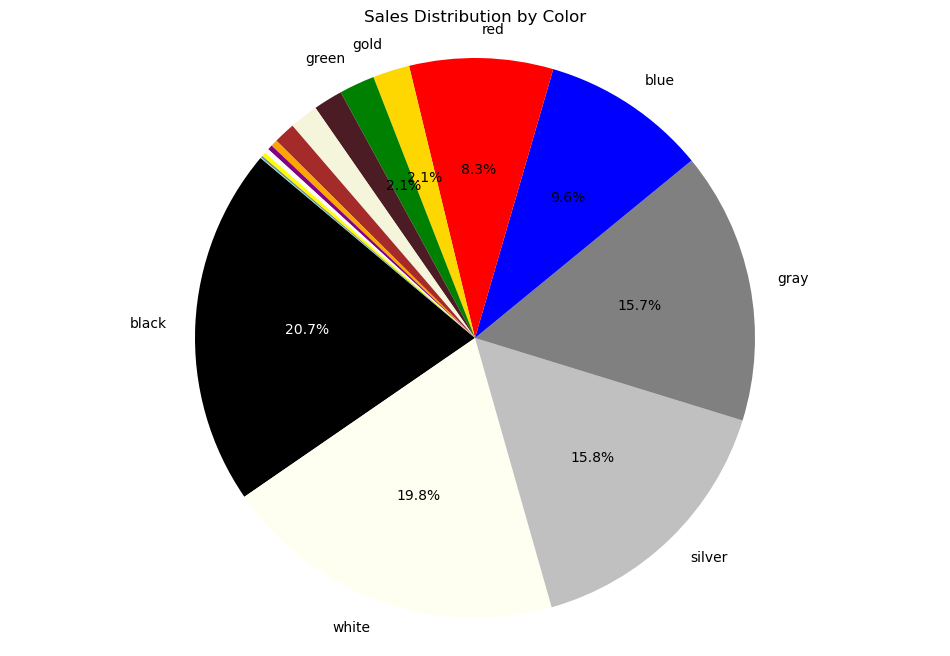

In [15]:
# Function to display percentage above 2%
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct >= 2 else ''

# Create the pie chart with corresponding colors
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(
    valid_colors, 
    labels=None,  # In the beginning, no Labels
    colors=[new_color_map[color.lower()] for color in valid_colors.index], 
    autopct=autopct_func, 
    startangle=140,
    textprops={'color': 'black'}
)

# Add label for tacks above 2%
total = valid_colors.sum()
for i, (text, autotext, wedge) in enumerate(zip(texts, autotexts, wedges)):
    pct = 100 * valid_colors.iloc[i] / total
    if pct >= 2:  # Show label only if above 2%
        text.set_text(valid_colors.index[i])
        text.set_color('black')
        autotext.set_color('black')
        if wedge.get_facecolor() == (0.0, 0.0, 0.0, 1.0):  # Black Color 
            text.set_color('black')
            autotext.set_color('white')
    else:
        text.set_text('')  # Blank text for rates below 2% 
        autotext.set_text('')

plt.title('Sales Distribution by Color')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

*The majority of car sales are dominated by neutral colors, with black (20.7%), white (19.7%), silver (15.8%), and grey (15.7%) making up the largest portions. Bright colors like blue (9.6%), red (8.3%), and yellow (2.1%) have smaller shares, indicating a preference for more conventional car colors*

#### What is the correlation between the Market Market Report (MMR) and the selling price of vehicles?

**Aims to understand the relationship between the MMR value, which is an industry benchmark for vehicle valuations, and the actual selling prices of vehicles.**

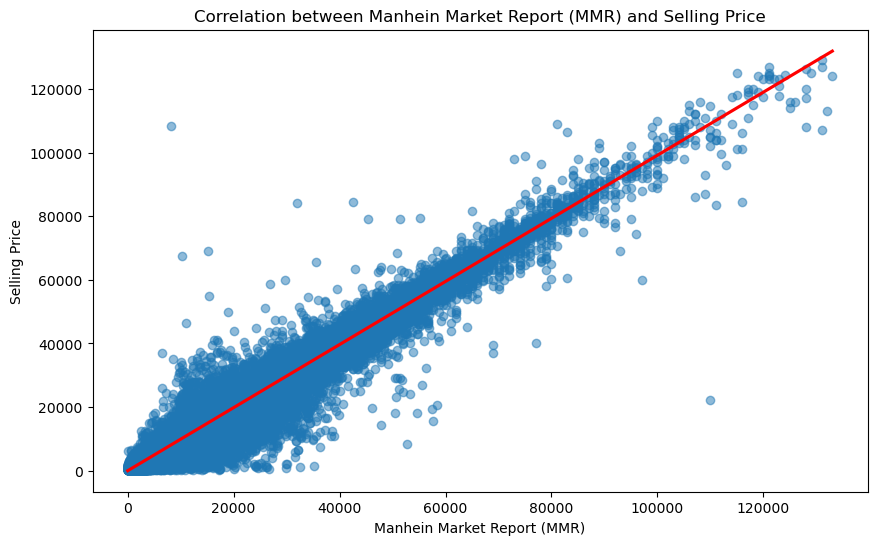

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(x='mmr', y='sellingprice', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Manhein Market Report (MMR) and Selling Price')
plt.xlabel('Manhein Market Report (MMR)')
plt.ylabel('Selling Price')
plt.show()

*The chart shows a positive correlation between market value (MMR) and selling price of cars.*

#### How does the condition of a vehicle affect its selling price?

Τhe analysis will help determine if there is a significant correlation between these two factors and how different conditions may influence the market value of vehicles.

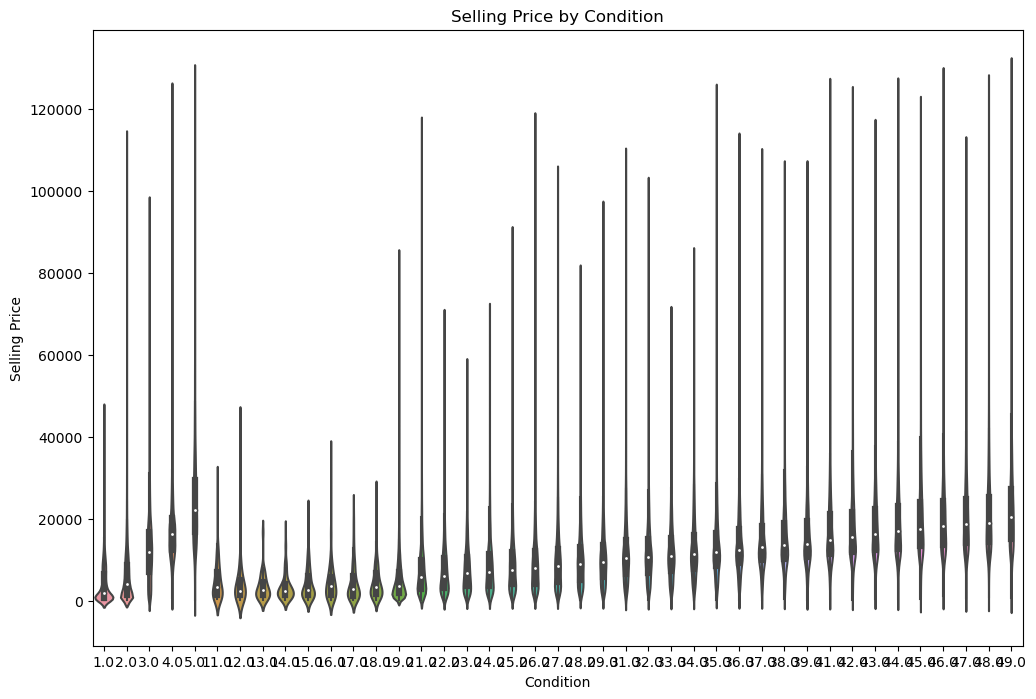

In [17]:
# Creating a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='condition', y='sellingprice', data=df)
plt.title('Selling Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.show()

*Better vehicle condition (higher condition rating) correlates with higher selling prices, and prices tend to increase as the condition improves. There is significant dispersion in selling prices, especially for vehicles in good condition, indicating that prices can vary widely.*

## Conclution

The analysis revealed which car model is the best-selling, which color dominates sales, the correlation between the Market Market Report (MMR) and the selling price, and the role the condition of the car plays in the sale. Overall, my Python data analysis project provided valuable insights into vehicle sales.